In [1]:
#warning 제거
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium as fol
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
plt.rc('font',family='Malgun Gothic')

In [3]:
shop = pd.read_csv('store_daegu.csv', encoding='utf-8')
shop.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,20547760,옛날포장마차,NaN,Q,음식,Q09,유흥주점,Q09A02,소주방/포장마차,I56219,...,2717010200113270001025963,NaN,대구광역시 서구 달서천로41길 22,703040,41723.0,NaN,NaN,NaN,128.558109,35.884908
1,20549469,박가냉면,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2714011000110210000008286,문화아파트,대구광역시 동구 동촌로14길 14,701862,41155.0,NaN,1,NaN,128.649065,35.887930
2,17174605,장충동왕족발,NaN,Q,음식,Q01,한식,Q01A08,족발/보쌈전문,I56111,...,2723010200100200001007645,스펙트럼시티,대구광역시 북구 침산로 93,702851,41593.0,NaN,NaN,NaN,128.589799,35.885235
3,24513354,종합꽃,NaN,D,소매,D02,선물/팬시/기념품,D02A02,꽃집/꽃배달,G47851,...,2723011200100380015000001,NaN,대구광역시 북구 복현로34길 11-10,702020,41522.0,2,NaN,NaN,128.619633,35.904571
4,20780924,한남광고,NaN,F,생활서비스,F12,광고/인쇄,F12A03,광고물제작,C33910,...,2717010300106830014017479,NaN,대구광역시 서구 문화로 241-1,703010,41773.0,NaN,1,NaN,128.559142,35.875827


In [4]:
color = ['#BF9FBF','#65678C','#5DA6A6','#B0BF99','#D7D9A3']
sns.set_palette("deep")
shop.shape

(96784, 39)

In [5]:
cafe_df = shop[shop['상권업종중분류명'].str.contains('카페')]
starbucks_df = shop[shop['상호명'].str.contains('스타벅스')]
ediya_df = shop[shop['상호명'].str.contains('이디야')]
cafe_df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
48,20553817,커피명가,2호점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2711010600100500000010507,경북대학교병원,대구광역시 중구 동덕로 130,700721,41944.0,NaN,3,NaN,128.604263,35.866091
62,20632867,카페나니아,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2723011200106810000019612,NaN,대구광역시 북구 경대로 109,702020,41565.0,NaN,NaN,NaN,128.618324,35.890157
91,19917719,은승다방,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2714010200103900007022548,NaN,대구광역시 동구 동부로 168,701020,41245.0,NaN,NaN,NaN,128.630784,35.877401
104,20545438,푸른초장교회북카페,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2729010400100440002000001,NaN,대구광역시 달서구 달구벌대로 973,704220,42602.0,NaN,4,3,128.473803,35.853652
127,20354433,대림다방,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2726010400101140014010405,NaN,대구광역시 수성구 들안로 235,706032,42133.0,NaN,-1,NaN,128.616548,35.851021


In [6]:
#스타벅스 + 지점명으로 인해 중복 포함한 shape
starbucks_df['상호명'].unique().shape


(9,)

In [7]:
starbucks_df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
2930,25807152,스타벅스,대구동천점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2723012400109080002000001,NaN,대구광역시 북구 동천로 123,702886,41423.0,NaN,NaN,NaN,128.560531,35.942563
3149,23311653,스타벅스,대구수성하이츠점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2726010600110900008028646,수성하이츠,대구광역시 수성구 수성로 393,706777,42007.0,NaN,NaN,NaN,128.613094,35.861161
3155,23511193,스타벅스,대구봉무점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2714010500115390008000001,NaN,대구광역시 동구 팔공로51길 15-11,701170,41026.0,NaN,NaN,NaN,128.639770,35.922041
4382,20532337,스타벅스,대구동촌유원지점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2714010300111050000000002,NaN,대구광역시 동구 효동로2길 45,701030,41179.0,NaN,NaN,NaN,128.653199,35.880094
5640,25234066,스타벅스,대구상인역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2729011500102280006007908,NaN,대구광역시 달서구 월배로 210,704370,42785.0,NaN,1,NaN,128.536550,35.818281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78934,20684832,스타벅스,동성로광장점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2711011900100910016008602,NaN,대구광역시 중구 동성로 4,700093,41942.0,NaN,2,1,128.594173,35.867295
82205,23322785,스타벅스,대구만촌점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2726010200108530003022868,NaN,대구광역시 수성구 달구벌대로 2636,706020,42068.0,NaN,3,2,128.650236,35.856369
82705,9780385,스타벅스대구반월당점,대구반월당점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2711011200100530003006516,동아쇼핑센터,대구광역시 중구 달구벌대로 2085,700717,41936.0,NaN,1,NaN,128.591852,35.866342
83330,19914188,스타벅스,대구계명대점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2729010700117210012010664,NaN,대구광역시 달서구 계대동문로 13,704921,42608.0,NaN,NaN,NaN,128.493811,35.855852


In [8]:
#상호명이 스타벅스라는  value가 있고 지점명이 따로있는경우 중복이 되는 문제가 있음
cafe_df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
48,20553817,커피명가,2호점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2711010600100500000010507,경북대학교병원,대구광역시 중구 동덕로 130,700721,41944.0,NaN,3,NaN,128.604263,35.866091
62,20632867,카페나니아,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2723011200106810000019612,NaN,대구광역시 북구 경대로 109,702020,41565.0,NaN,NaN,NaN,128.618324,35.890157
91,19917719,은승다방,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2714010200103900007022548,NaN,대구광역시 동구 동부로 168,701020,41245.0,NaN,NaN,NaN,128.630784,35.877401
104,20545438,푸른초장교회북카페,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2729010400100440002000001,NaN,대구광역시 달서구 달구벌대로 973,704220,42602.0,NaN,4,3,128.473803,35.853652
127,20354433,대림다방,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2726010400101140014010405,NaN,대구광역시 수성구 들안로 235,706032,42133.0,NaN,-1,NaN,128.616548,35.851021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96521,17759027,캔버스,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2720010300101660001016960,NaN,대구광역시 남구 대명로57길 31,705802,42418.0,NaN,1,NaN,128.586158,35.845035
96579,17697909,마실,커피계명대점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2729010700117120009000610,NaN,대구광역시 달서구 서당로9길 48,704921,42608.0,NaN,1,NaN,128.492928,35.856324
96659,17777340,탑리터연경점,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2723013100110250004000001,NaN,대구광역시 북구 연경중앙로 8,702130,41409.0,NaN,1,102,128.618584,35.943522
96754,17706059,더벤티,수성시장점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2726010500103290000019588,NaN,대구광역시 수성구 명덕로 435,706833,42119.0,NaN,1,NaN,128.617825,35.854431


In [9]:

# coffee['상호명'].str.cat(coffee['지점명'].astype(str))
# 결측치도 문자열로 인식되어 합쳐짐..
starbucks_df['상호지점명'] = starbucks_df['상호명'] + starbucks_df['지점명'].fillna('')
# 해결

In [10]:
# 상호명이 '스타벅스' 달고있는 커피집 확인
starbucks_df.loc[starbucks_df['상호명'].str.contains('스타벅스'), '상호명'].unique()


array(['스타벅스', '스타벅스대구테크노폴리스점', '스타벅스대구도원DT점', '스타벅스대구황금DT점',
       '스타벅스신세계백화점대구점', '스타벅스대구수성네거리DT점', '스타벅스동성로중앙점', '스타벅스대구유통단지점',
       '스타벅스대구반월당점'], dtype=object)

In [11]:
starbucks_df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도', '상호지점명'],
      dtype='object')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


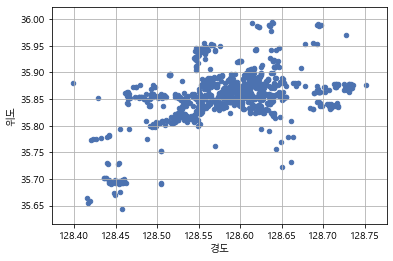

In [12]:
# 표본 1000개로 경도, 위도 데이터를 이용해 전체카페 분포도 #
cafe_df[:1000].plot.scatter(x="경도", y="위도", grid="True")


In [13]:
daegu = shop[['시군구명', '상권업종대분류명', '상권업종중분류명', '위도', '경도']]


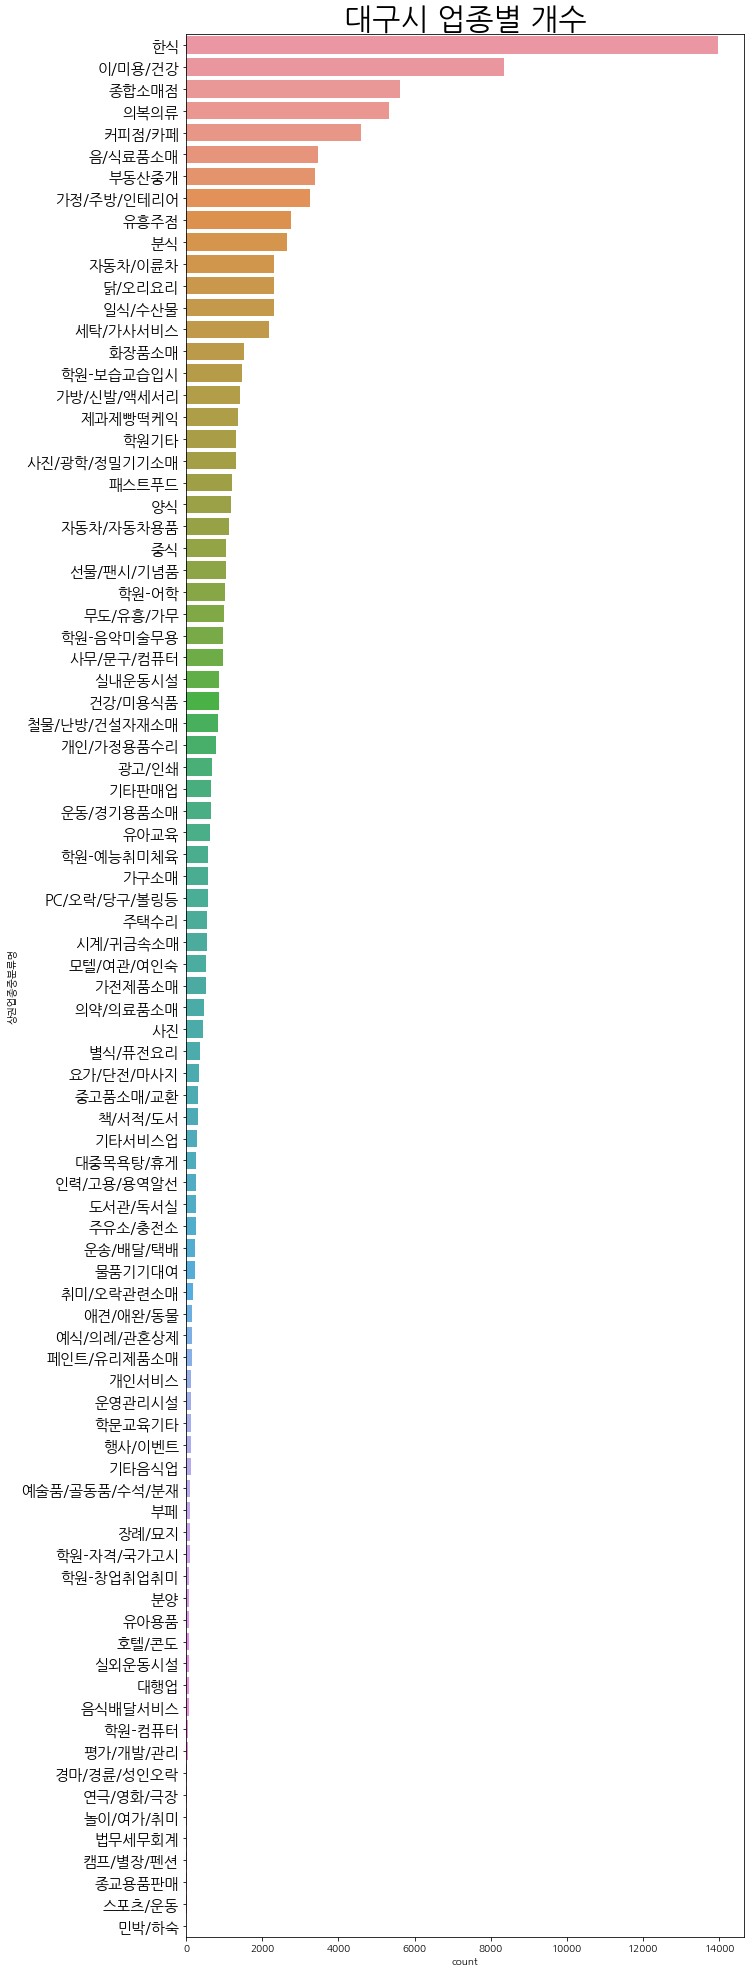

In [14]:
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(10, 35))
sns.countplot(y=daegu['상권업종중분류명'], order=daegu['상권업종중분류명'].value_counts().index)
plt.yticks(fontsize=15)
plt.title('대구시 업종별 개수', fontsize=30)
plt.show()

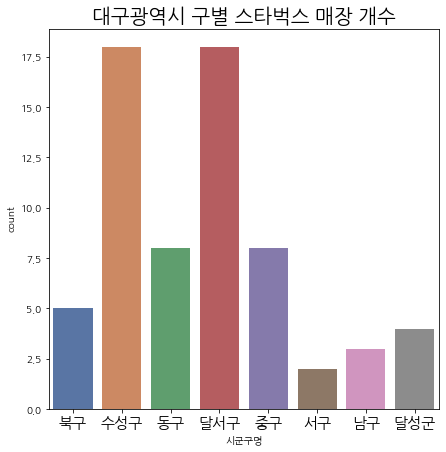

In [15]:
# 대구광역시 구별 스타벅스 매장 개수 countplot으로 시각화 #
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(7, 7))
sns.countplot(x='시군구명', data=starbucks_df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.title('대구광역시 구별 스타벅스 매장 개수', fontsize=20)
plt.show()

#ax.set(title = "Title")

In [16]:
ediya_df.head(20)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
2821,25343089,이디야커피,대구범어두레점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2726010100103050003021099,두레맨션,대구광역시 수성구 달구벌대로496길 72,706771,42105.0,NaN,NaN,NaN,128.634550,35.852487
7606,23377551,이디야커피,대구범어점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2726010100100010001029599,NaN,대구광역시 수성구 국채보상로 856,706010,42012.0,NaN,NaN,NaN,128.624212,35.866899
10147,12423839,이디야커피,대구옥포점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2771034022129150000000001,NaN,대구광역시 달성군 옥포면 돌미로 73,711843,42974.0,NaN,1,NaN,128.441570,35.780992
11625,11804616,이디야커피대구종로점,대구종로점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2711013700100920000000001,남성로두레빌딩,대구광역시 중구 종로 17,700230,41934.0,NaN,1,NaN,128.592014,35.867396
13116,16655119,이디야커피,대구파티마병원점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2714010100105760020031829,NaN,대구광역시 동구 아양로 81,701819,41198.0,NaN,1,102,128.622889,35.883292
14442,16594517,이디야커피,대구현풍케이스마트,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2771025928111450007000001,NaN,대구광역시 달성군 유가읍 테크노순환로4길 8,711882,43024.0,NaN,NaN,NaN,128.455935,35.675670
14448,16599503,이디야커피,대구대신중앙점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2711015400119160000014207,대신E편한세상,대구광역시 중구 달구벌대로 1943,700320,41930.0,NaN,3,NaN,128.576783,35.863594
14449,16598006,이디야커피,대구동성로중앙점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2711012200100160005007242,NaN,대구광역시 중구 동성로3길 95,700150,41938.0,NaN,4,NaN,128.598266,35.869672
14482,16594788,이디야커피,대구성서운동장점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2729010800113100009002164,NaN,대구광역시 달서구 선원로23길 5,704941,42604.0,NaN,NaN,NaN,128.505238,35.859455
14586,16599504,이디야커피,대구반야월점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2714012400108100000024930,NaN,"대구광역시 동구 반야월로 369, (신서동)",701870,41075.0,NaN,3,NaN,128.728966,35.871970


In [17]:
#ediya_df.loc[len(ediya_df['상호명'])>5]='이디야커피'
ediya_df.shape

(71, 39)

In [18]:
# ediya_df 상호명 전처리를 위해 인덱스 재설정을 해줍니다.. #
ediya_df = ediya_df.reset_index(drop=True)
starbucks_df = starbucks_df.reset_index(drop=True)

In [19]:
ediya_df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,25343089,이디야커피,대구범어두레점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2726010100103050003021099,두레맨션,대구광역시 수성구 달구벌대로496길 72,706771,42105.0,NaN,NaN,NaN,128.634550,35.852487
1,23377551,이디야커피,대구범어점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2726010100100010001029599,NaN,대구광역시 수성구 국채보상로 856,706010,42012.0,NaN,NaN,NaN,128.624212,35.866899
2,12423839,이디야커피,대구옥포점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2771034022129150000000001,NaN,대구광역시 달성군 옥포면 돌미로 73,711843,42974.0,NaN,1,NaN,128.441570,35.780992
3,11804616,이디야커피대구종로점,대구종로점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2711013700100920000000001,남성로두레빌딩,대구광역시 중구 종로 17,700230,41934.0,NaN,1,NaN,128.592014,35.867396
4,16655119,이디야커피,대구파티마병원점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2714010100105760020031829,NaN,대구광역시 동구 아양로 81,701819,41198.0,NaN,1,102,128.622889,35.883292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,17513200,이디야커피,대구유천점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2729011900109340000009743,NaN,대구광역시 달서구 조암로 149,704830,42759.0,NaN,1,109,128.516026,35.819029
67,17450235,이디야커피,대구이곡점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2729010800112200002005021,NaN,대구광역시 달서구 이곡서로 11,704940,42612.0,NaN,1,NaN,128.505823,35.853882
68,17528011,이디야커피,남산점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2711015600123850005020419,남산역화성파크드림,대구광역시 중구 남산로7길 7,700444,41977.0,302,NaN,101,128.582339,35.858700
69,17660014,이디야커피,비산점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2717010200105060002008755,NaN,대구광역시 서구 달서로 172,703811,41794.0,NaN,1,NaN,128.571546,35.877499


In [20]:
#이디야커피 지점명이름이 상호명에 중복으로 붙어져있는 경우가 있어서 전처리 해줍니다. #
ediya_count = len(ediya_df)
for i in range(ediya_count) :
    print(ediya_df['상호명'][i])
    if ediya_df['상호명'][i] == '이디야커피' :
        pass
    else :
        ediya_df['상호명'] = '이디야커피'
for i in range(ediya_count) :
    print(ediya_df['상호명'][i])
#df['B']  = np.where(df['B'] == 'a', 'aa', df['B'])

이디야커피
이디야커피
이디야커피
이디야커피대구종로점
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피
이디야커피


In [21]:
# 상호명 + 지점명 결합 -> 문자열 'NaN' 결합 방지를 위해 fillna() 사용 #
ediya_df['상호지점명'] = ediya_df['상호명'] + ediya_df['지점명'].fillna('')

In [22]:
ediya_df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,상호지점명
0,25343089,이디야커피,대구범어두레점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,두레맨션,대구광역시 수성구 달구벌대로496길 72,706771,42105.0,NaN,NaN,NaN,128.634550,35.852487,이디야커피대구범어두레점
1,23377551,이디야커피,대구범어점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 수성구 국채보상로 856,706010,42012.0,NaN,NaN,NaN,128.624212,35.866899,이디야커피대구범어점
2,12423839,이디야커피,대구옥포점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 달성군 옥포면 돌미로 73,711843,42974.0,NaN,1,NaN,128.441570,35.780992,이디야커피대구옥포점
3,11804616,이디야커피,대구종로점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,남성로두레빌딩,대구광역시 중구 종로 17,700230,41934.0,NaN,1,NaN,128.592014,35.867396,이디야커피대구종로점
4,16655119,이디야커피,대구파티마병원점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 동구 아양로 81,701819,41198.0,NaN,1,102,128.622889,35.883292,이디야커피대구파티마병원점


In [23]:
ediya_df.shape

(71, 40)

In [24]:
starbucks_df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,상호지점명
0,25807152,스타벅스,대구동천점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 북구 동천로 123,702886,41423.0,NaN,NaN,NaN,128.560531,35.942563,스타벅스대구동천점
1,23311653,스타벅스,대구수성하이츠점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,수성하이츠,대구광역시 수성구 수성로 393,706777,42007.0,NaN,NaN,NaN,128.613094,35.861161,스타벅스대구수성하이츠점
2,23511193,스타벅스,대구봉무점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 동구 팔공로51길 15-11,701170,41026.0,NaN,NaN,NaN,128.639770,35.922041,스타벅스대구봉무점
3,20532337,스타벅스,대구동촌유원지점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 동구 효동로2길 45,701030,41179.0,NaN,NaN,NaN,128.653199,35.880094,스타벅스대구동촌유원지점
4,25234066,스타벅스,대구상인역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 달서구 월배로 210,704370,42785.0,NaN,1,NaN,128.536550,35.818281,스타벅스대구상인역점
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,20684832,스타벅스,동성로광장점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 중구 동성로 4,700093,41942.0,NaN,2,1,128.594173,35.867295,스타벅스동성로광장점
62,23322785,스타벅스,대구만촌점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 수성구 달구벌대로 2636,706020,42068.0,NaN,3,2,128.650236,35.856369,스타벅스대구만촌점
63,9780385,스타벅스대구반월당점,대구반월당점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,동아쇼핑센터,대구광역시 중구 달구벌대로 2085,700717,41936.0,NaN,1,NaN,128.591852,35.866342,스타벅스대구반월당점대구반월당점
64,19914188,스타벅스,대구계명대점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 달서구 계대동문로 13,704921,42608.0,NaN,NaN,NaN,128.493811,35.855852,스타벅스대구계명대점


In [25]:
#마찬가지로 스타벅스도 대구반월당점과 같이 지점명이 붙어있는 문자열을 스타벅스로 통일 시켜줍니다 #
starbucks_count = len(starbucks_df)
for i in range(starbucks_count) :
    print(starbucks_df['상호명'][i])
    if starbucks_df['상호명'][i] == '스타벅스' :
        pass
    else :
        starbucks_df['상호명'] = '스타벅스'

스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스대구테크노폴리스점
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스
스타벅스


In [26]:
starbucks_df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,상호지점명
0,25807152,스타벅스,대구동천점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 북구 동천로 123,702886,41423.0,NaN,NaN,NaN,128.560531,35.942563,스타벅스대구동천점
1,23311653,스타벅스,대구수성하이츠점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,수성하이츠,대구광역시 수성구 수성로 393,706777,42007.0,NaN,NaN,NaN,128.613094,35.861161,스타벅스대구수성하이츠점
2,23511193,스타벅스,대구봉무점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 동구 팔공로51길 15-11,701170,41026.0,NaN,NaN,NaN,128.639770,35.922041,스타벅스대구봉무점
3,20532337,스타벅스,대구동촌유원지점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 동구 효동로2길 45,701030,41179.0,NaN,NaN,NaN,128.653199,35.880094,스타벅스대구동촌유원지점
4,25234066,스타벅스,대구상인역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 달서구 월배로 210,704370,42785.0,NaN,1,NaN,128.536550,35.818281,스타벅스대구상인역점
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,20684832,스타벅스,동성로광장점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 중구 동성로 4,700093,41942.0,NaN,2,1,128.594173,35.867295,스타벅스동성로광장점
62,23322785,스타벅스,대구만촌점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 수성구 달구벌대로 2636,706020,42068.0,NaN,3,2,128.650236,35.856369,스타벅스대구만촌점
63,9780385,스타벅스,대구반월당점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,동아쇼핑센터,대구광역시 중구 달구벌대로 2085,700717,41936.0,NaN,1,NaN,128.591852,35.866342,스타벅스대구반월당점대구반월당점
64,19914188,스타벅스,대구계명대점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 달서구 계대동문로 13,704921,42608.0,NaN,NaN,NaN,128.493811,35.855852,스타벅스대구계명대점


In [27]:
# 스타벅스와 이디야커피 각각의 df를 하나의 df로 결합시켜줍니다 #
starediya_df = pd.concat([starbucks_df, ediya_df]) 

In [28]:
starediya_df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,상호지점명
0,25807152,스타벅스,대구동천점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 북구 동천로 123,702886,41423.0,NaN,NaN,NaN,128.560531,35.942563,스타벅스대구동천점
1,23311653,스타벅스,대구수성하이츠점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,수성하이츠,대구광역시 수성구 수성로 393,706777,42007.0,NaN,NaN,NaN,128.613094,35.861161,스타벅스대구수성하이츠점
2,23511193,스타벅스,대구봉무점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 동구 팔공로51길 15-11,701170,41026.0,NaN,NaN,NaN,128.639770,35.922041,스타벅스대구봉무점
3,20532337,스타벅스,대구동촌유원지점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 동구 효동로2길 45,701030,41179.0,NaN,NaN,NaN,128.653199,35.880094,스타벅스대구동촌유원지점
4,25234066,스타벅스,대구상인역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 달서구 월배로 210,704370,42785.0,NaN,1,NaN,128.536550,35.818281,스타벅스대구상인역점
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,17513200,이디야커피,대구유천점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 달서구 조암로 149,704830,42759.0,NaN,1,109,128.516026,35.819029,이디야커피대구유천점
67,17450235,이디야커피,대구이곡점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 달서구 이곡서로 11,704940,42612.0,NaN,1,NaN,128.505823,35.853882,이디야커피대구이곡점
68,17528011,이디야커피,남산점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,남산역화성파크드림,대구광역시 중구 남산로7길 7,700444,41977.0,302,NaN,101,128.582339,35.858700,이디야커피남산점
69,17660014,이디야커피,비산점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,NaN,대구광역시 서구 달서로 172,703811,41794.0,NaN,1,NaN,128.571546,35.877499,이디야커피비산점


In [29]:
# 스타벅스와 이디야커피를 병합한 df확인#
starediya_df[['상호명','상호지점명']]

,상호명,상호지점명
0,스타벅스,스타벅스대구동천점
1,스타벅스,스타벅스대구수성하이츠점
2,스타벅스,스타벅스대구봉무점
3,스타벅스,스타벅스대구동촌유원지점
4,스타벅스,스타벅스대구상인역점
...,...,...
66,이디야커피,이디야커피대구유천점
67,이디야커피,이디야커피대구이곡점
68,이디야커피,이디야커피남산점
69,이디야커피,이디야커피비산점


In [30]:
#대구 안에 있는 이디야 커피와 스타벅스 매장 총 개수 출력# 
starediya_df['상호명'].value_counts()

이디야커피    71
스타벅스     66
Name: 상호명, dtype: int64

In [31]:
len(starediya_df)

137

In [32]:
starediya_df.loc[starediya_df['상호명'].isnull(), '상호지점명'].head()

Series([], Name: 상호지점명, dtype: object)

In [33]:

starediya_df.loc[starediya_df['상호지점명'].str.contains('스타벅스'), '상호명'] = '스타벅스'
starediya_df['상호명'] = starediya_df['상호명'].fillna('이디야')

In [34]:
#############################################################

In [35]:
#df_cafe = starediya_df[starediya_df['상호지점명'].str.contains('스타벅스|starbucks|STARBUCKS|이디야|ediya|EDIYA')]
#  shop df에서상호명 columns에 '스타벅스','이디야'가 포함된 데이터들 df_cafe 데이터 프레임으로 #
df_cafe = shop[shop['상호명'].str.contains('스타벅스|이디야')]
df_cafe.shape


(137, 39)

In [36]:
#
df_cafe.loc[df_cafe['상호명'].str.contains('스타벅스'), '브랜드명'] = '스타벅스'
df_cafe['브랜드명'] = df_cafe['브랜드명'].fillna('이디야')
df_cafe.loc[df_cafe['브랜드명'].isnull(), '상호명'].head()


Series([], Name: 상호명, dtype: object)

In [37]:
df_cafe[['상호명','브랜드명']].head()


,상호명,브랜드명
2821,이디야커피,이디야
2930,스타벅스,스타벅스
3149,스타벅스,스타벅스
3155,스타벅스,스타벅스
4382,스타벅스,스타벅스


In [38]:
df_cafe['브랜드명'].value_counts()


이디야     71
스타벅스    66
Name: 브랜드명, dtype: int64

In [41]:

#에러나면 fol.circlemaker부터 
map = fol.Map(location=[df_cafe['위도'].mean(), df_cafe['경도'].mean()], zoom_start=12)

for n in df_cafe.index:

    if df_cafe.loc[n, '브랜드명'] == '스타벅스' :
        popup_name = df_cafe.loc[n, '상호명'] + ' - ' + df_cafe.loc[n, '도로명주소']
        icon_color = 'green'
    else:
        icon_color = 'blue'    

    fol.CircleMarker(
        location=[df_cafe.loc[n,'위도'], df_cafe.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

map

In [259]:
daegu = shop[['시군구명', '상권업종대분류명', '상권업종중분류명', '위도', '경도']]
daegu_coffee = daegu.loc[daegu['상권업종중분류명'] == '커피점/카페']
daegu_coffee


,시군구명,상권업종대분류명,상권업종중분류명,위도,경도
48,중구,음식,커피점/카페,35.866091,128.604263
62,북구,음식,커피점/카페,35.890157,128.618324
91,동구,음식,커피점/카페,35.877401,128.630784
104,달서구,음식,커피점/카페,35.853652,128.473803
127,수성구,음식,커피점/카페,35.851021,128.616548
...,...,...,...,...,...
96521,남구,음식,커피점/카페,35.845035,128.586158
96579,달서구,음식,커피점/카페,35.856324,128.492928
96659,북구,음식,커피점/카페,35.943522,128.618584
96754,수성구,음식,커피점/카페,35.854431,128.617825


In [260]:
cafe_rate = pd.read_csv('data3/cafe_total_rate.csv', encoding='utf-8')
cafe_rate.head()

,Name,Score,Review,Link,Addr
0,세라젬 웰카페 대구동천직영점,3.8,3.0,https://place.map.kakao.com/1863538951,\n대구 북구 동천로 120 1층\n(지번) 동천동 909-5\n
1,카페데코믹스 대구점,1.7,1.0,https://place.map.kakao.com/1684398673,\n대구 북구 동북로 276 2층\n(지번) 복현동 460-3\n
2,아이랑소금놀이키즈카페 대구점,0.0,24.0,https://place.map.kakao.com/362861147,\n대구 북구 침산남로 92 경맥빌딩 6층\n(지번) 침산동 430-7\n
3,일리카페 대구칠성침산점,2.7,1.0,https://place.map.kakao.com/961325516,\n대구 북구 칠성남로15길 13 4층\n(지번) 칠성동2가 74\n
4,르하임스터디카페대구경북대점,3.0,4.0,https://place.map.kakao.com/1289803268,\n대구 북구 대학로 117\n(지번) 산격동 1277-13\n


In [261]:
cafe_rate.shape

(2560, 5)

In [262]:
cafe_rate['Score'].isnull()
#= pd.to_numeric(cafe_rate['Score'])


0       False
1       False
2       False
3       False
4       False
        ...  
2555    False
2556     True
2557     True
2558     True
2559     True
Name: Score, Length: 2560, dtype: bool

In [263]:
cafe_rate['Score'].fillna(0.0)

0       3.8
1       1.7
2       0.0
3       2.7
4       3.0
       ... 
2555    0.0
2556    0.0
2557    0.0
2558    0.0
2559    0.0
Name: Score, Length: 2560, dtype: float64

In [264]:
cafe_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    2557 non-null   object 
 1   Score   2555 non-null   float64
 2   Review  2556 non-null   float64
 3   Link    2556 non-null   object 
 4   Addr    2556 non-null   object 
dtypes: float64(2), object(3)
memory usage: 100.1+ KB


In [265]:
#높은 평점과 낮은 평점의 입지 차이 score는 4.5이상, 2.0 이하로 good store와 bad store를 구분하였고 리뷰가 15개 이상인 매장만 필터링#
high_rate_coffee = cafe_rate[cafe_rate['Score']>=4.5]
high_rate_coffee = high_rate_coffee[high_rate_coffee['Review']>=15]
row_rate_coffee = cafe_rate[cafe_rate['Score']<=2.0]
row_rate_coffee = row_rate_coffee[row_rate_coffee['Review']>=15]
high_rate_coffee

,Name,Score,Review,Link,Addr
42,카페디치엘로,5.0,17.0,https://place.map.kakao.com/26456886,\n대구 북구 유통단지로8길 46\n(지번) 산격동 285-4\n
45,카페얼바인,5.0,19.0,https://place.map.kakao.com/569815086,\n대구 북구 칠곡중앙대로63길 9-11 1층\n(지번) 태전동 238-5\n
49,목로카페,5.0,35.0,https://place.map.kakao.com/893172422,\n대구 북구 경대로17길 2\n(지번) 복현동 618-25\n
58,카페 피상리,5.0,17.0,https://place.map.kakao.com/1786134964,\n대구 북구 연경중앙로8길 3-7 1층\n(지번) 연경동 1028-1\n
78,21보드게임카페,5.0,15.0,https://place.map.kakao.com/662010476,\n대구 북구 학정로 429 2층 201호\n(지번) 동천동 896-5\n
...,...,...,...,...,...
2302,앤드커피,5.0,20.0,https://place.map.kakao.com/1314751511,\n대구 수성구 들안로 131 1층\n(지번) 중동 190-8\n
2349,알케미커피,5.0,18.0,https://place.map.kakao.com/26593790,\n대구 수성구 세진로 57\n(지번) 만촌동 960-72\n
2358,15구역,4.5,21.0,https://place.map.kakao.com/1366095990,\n대구 수성구 동대구로14길 96\n(지번) 지산동 976-15\n
2466,카페27초,5.0,38.0,https://place.map.kakao.com/1068046443,\n대구 수성구 청호로96안길 27\n(지번) 만촌동 1053\n


In [266]:
#columns name 을 상호지점명으로 main df와 컬럼 통일
high_rate_coffee.rename(columns = {'Name' : '상호지점명'}, inplace = True)
row_rate_coffee.rename(columns = {'Name' : '상호지점명'}, inplace = True)
high_rate_coffee

,상호지점명,Score,Review,Link,Addr
42,카페디치엘로,5.0,17.0,https://place.map.kakao.com/26456886,\n대구 북구 유통단지로8길 46\n(지번) 산격동 285-4\n
45,카페얼바인,5.0,19.0,https://place.map.kakao.com/569815086,\n대구 북구 칠곡중앙대로63길 9-11 1층\n(지번) 태전동 238-5\n
49,목로카페,5.0,35.0,https://place.map.kakao.com/893172422,\n대구 북구 경대로17길 2\n(지번) 복현동 618-25\n
58,카페 피상리,5.0,17.0,https://place.map.kakao.com/1786134964,\n대구 북구 연경중앙로8길 3-7 1층\n(지번) 연경동 1028-1\n
78,21보드게임카페,5.0,15.0,https://place.map.kakao.com/662010476,\n대구 북구 학정로 429 2층 201호\n(지번) 동천동 896-5\n
...,...,...,...,...,...
2302,앤드커피,5.0,20.0,https://place.map.kakao.com/1314751511,\n대구 수성구 들안로 131 1층\n(지번) 중동 190-8\n
2349,알케미커피,5.0,18.0,https://place.map.kakao.com/26593790,\n대구 수성구 세진로 57\n(지번) 만촌동 960-72\n
2358,15구역,4.5,21.0,https://place.map.kakao.com/1366095990,\n대구 수성구 동대구로14길 96\n(지번) 지산동 976-15\n
2466,카페27초,5.0,38.0,https://place.map.kakao.com/1068046443,\n대구 수성구 청호로96안길 27\n(지번) 만촌동 1053\n


In [267]:
#addr 컬럼에서 크롤링으로 줄바꿈이 \n으로 나오는거 전처리#
high_rate_coffee["Addr"]=high_rate_coffee["Addr"].str.replace("\n","")
row_rate_coffee["Addr"]=row_rate_coffee["Addr"].str.replace("\n","")
row_rate_coffee
#high_rate_coffee["Addr"]=high_rate_coffee["Addr"].str.replace("(지번)"*,"")

,상호지점명,Score,Review,Link,Addr
2,아이랑소금놀이키즈카페 대구점,0.0,24.0,https://place.map.kakao.com/362861147,대구 북구 침산남로 92 경맥빌딩 6층(지번) 침산동 430-7
192,카페모리,0.0,44.0,https://place.map.kakao.com/205485276,대구 북구 학정로42길 22-51(지번) 구암동 561
304,나인블럭 투가든대구점,2.0,63.0,https://place.map.kakao.com/529847219,대구 북구 옥산로 118(지번) 고성동3가 7-1
314,너티차일드 대구점,1.3,28.0,https://place.map.kakao.com/2127630329,대구 북구 호암로 51 대구삼성창조경제단지 파크몰 B동 2층(지번) 침산동 1759
332,블레스롤 대구침산점,0.0,23.0,https://place.map.kakao.com/1503430340,대구 북구 옥산로 106-1(지번) 고성동3가 11-1
...,...,...,...,...,...
2334,템푸스커피,0.0,19.0,https://place.map.kakao.com/219909153,대구 수성구 달구벌대로 3099 1층(지번) 시지동 130-4
2357,공주다육카페,0.0,15.0,https://place.map.kakao.com/395533873,대구 수성구 무학로21길 18(지번) 두산동 178-12
2465,오늘,0.0,17.0,https://place.map.kakao.com/1564944625,대구 수성구 동대구로77길 16 1층(지번) 범어동 12-5
2500,데프커피,0.0,16.0,https://place.map.kakao.com/934047711,대구 수성구 동대구로12안길 9 1층(지번) 지산동 995-2


In [268]:
# ''\n' 이 제거된 모습#
high_rate_coffee

,상호지점명,Score,Review,Link,Addr
42,카페디치엘로,5.0,17.0,https://place.map.kakao.com/26456886,대구 북구 유통단지로8길 46(지번) 산격동 285-4
45,카페얼바인,5.0,19.0,https://place.map.kakao.com/569815086,대구 북구 칠곡중앙대로63길 9-11 1층(지번) 태전동 238-5
49,목로카페,5.0,35.0,https://place.map.kakao.com/893172422,대구 북구 경대로17길 2(지번) 복현동 618-25
58,카페 피상리,5.0,17.0,https://place.map.kakao.com/1786134964,대구 북구 연경중앙로8길 3-7 1층(지번) 연경동 1028-1
78,21보드게임카페,5.0,15.0,https://place.map.kakao.com/662010476,대구 북구 학정로 429 2층 201호(지번) 동천동 896-5
...,...,...,...,...,...
2302,앤드커피,5.0,20.0,https://place.map.kakao.com/1314751511,대구 수성구 들안로 131 1층(지번) 중동 190-8
2349,알케미커피,5.0,18.0,https://place.map.kakao.com/26593790,대구 수성구 세진로 57(지번) 만촌동 960-72
2358,15구역,4.5,21.0,https://place.map.kakao.com/1366095990,대구 수성구 동대구로14길 96(지번) 지산동 976-15
2466,카페27초,5.0,38.0,https://place.map.kakao.com/1068046443,대구 수성구 청호로96안길 27(지번) 만촌동 1053


In [269]:
# 인덱스를 key 형태로 사용하기 위해 index를 reset 해준다. #
high_rate_coffee= high_rate_coffee.reset_index(drop=True)
row_rate_coffee= row_rate_coffee.reset_index(drop=True)
#for i in range(len(high_rate_coffee)):
#    print(high_rate_coffee['Addr'][i])

In [270]:
# main으로 쓴 dataset이 주소에 층이 포함되지 않아서 층은 replace로 공백으로 만들어준다 #
for i in range(len(high_rate_coffee)):
    index_num = high_rate_coffee['Addr'][i].find("(지번)") #지번 index를 찾아서
    #high_rate_coffee['Addr'][i]= string[:posn-1]
    high_rate_coffee['Addr'][i] = high_rate_coffee['Addr'][i][:index_num]
    high_rate_coffee['Addr'][i]=high_rate_coffee['Addr'][i].replace(" 1층","")
    high_rate_coffee['Addr'][i]=high_rate_coffee['Addr'][i].replace(" 2층","")
    high_rate_coffee['Addr'][i]=high_rate_coffee['Addr'][i].replace(" 3층","")
    high_rate_coffee['Addr'][i]=high_rate_coffee['Addr'][i].replace(" 4층","")
    high_rate_coffee['Addr'][i]=high_rate_coffee['Addr'][i].replace(" 5층","")
    high_rate_coffee['Addr'][i]=high_rate_coffee['Addr'][i].replace(" 6층","")
    high_rate_coffee['Addr'][i]=high_rate_coffee['Addr'][i].replace(" 7층","")
    high_rate_coffee['Addr'][i]=high_rate_coffee['Addr'][i].replace(" 8층","")
    high_rate_coffee['Addr'][i]=high_rate_coffee['Addr'][i].replace(" 9층","")
    high_rate_coffee['Addr'][i]=high_rate_coffee['Addr'][i].replace(" 10층","")
    
    #DF.loc[row, :]

In [271]:
high_rate_coffee

,상호지점명,Score,Review,Link,Addr
0,카페디치엘로,5.0,17.0,https://place.map.kakao.com/26456886,대구 북구 유통단지로8길 46
1,카페얼바인,5.0,19.0,https://place.map.kakao.com/569815086,대구 북구 칠곡중앙대로63길 9-11
2,목로카페,5.0,35.0,https://place.map.kakao.com/893172422,대구 북구 경대로17길 2
3,카페 피상리,5.0,17.0,https://place.map.kakao.com/1786134964,대구 북구 연경중앙로8길 3-7
4,21보드게임카페,5.0,15.0,https://place.map.kakao.com/662010476,대구 북구 학정로 429 201호
...,...,...,...,...,...
168,앤드커피,5.0,20.0,https://place.map.kakao.com/1314751511,대구 수성구 들안로 131
169,알케미커피,5.0,18.0,https://place.map.kakao.com/26593790,대구 수성구 세진로 57
170,15구역,4.5,21.0,https://place.map.kakao.com/1366095990,대구 수성구 동대구로14길 96
171,카페27초,5.0,38.0,https://place.map.kakao.com/1068046443,대구 수성구 청호로96안길 27


In [272]:
#row_rate_coffee도 마찬가지로 층을 주소에서 없애준다 #
for i in range(len(row_rate_coffee)):
    index_num = row_rate_coffee['Addr'][i].find("(지번)") #지번 index를 찾아서
    #high_rate_coffee['Addr'][i]= string[:posn-1]
    row_rate_coffee['Addr'][i] = row_rate_coffee['Addr'][i][:index_num]
    row_rate_coffee['Addr'][i]=row_rate_coffee['Addr'][i].replace(" 1층","")
    row_rate_coffee['Addr'][i]=row_rate_coffee['Addr'][i].replace(" 2층","")
    row_rate_coffee['Addr'][i]=row_rate_coffee['Addr'][i].replace(" 3층","")
    row_rate_coffee['Addr'][i]=row_rate_coffee['Addr'][i].replace(" 4층","")
    row_rate_coffee['Addr'][i]=row_rate_coffee['Addr'][i].replace(" 5층","")
    row_rate_coffee['Addr'][i]=row_rate_coffee['Addr'][i].replace(" 6층","")
    row_rate_coffee['Addr'][i]=row_rate_coffee['Addr'][i].replace(" 7층","")
    row_rate_coffee['Addr'][i]=row_rate_coffee['Addr'][i].replace(" 8층","")
    row_rate_coffee['Addr'][i]=row_rate_coffee['Addr'][i].replace(" 9층","")
    row_rate_coffee['Addr'][i]=row_rate_coffee['Addr'][i].replace(" 10층","")
    
    #DF.loc[row, :]

In [273]:
row_rate_coffee

,상호지점명,Score,Review,Link,Addr
0,아이랑소금놀이키즈카페 대구점,0.0,24.0,https://place.map.kakao.com/362861147,대구 북구 침산남로 92 경맥빌딩
1,카페모리,0.0,44.0,https://place.map.kakao.com/205485276,대구 북구 학정로42길 22-51
2,나인블럭 투가든대구점,2.0,63.0,https://place.map.kakao.com/529847219,대구 북구 옥산로 118
3,너티차일드 대구점,1.3,28.0,https://place.map.kakao.com/2127630329,대구 북구 호암로 51 대구삼성창조경제단지 파크몰 B동
4,블레스롤 대구침산점,0.0,23.0,https://place.map.kakao.com/1503430340,대구 북구 옥산로 106-1
...,...,...,...,...,...
80,템푸스커피,0.0,19.0,https://place.map.kakao.com/219909153,대구 수성구 달구벌대로 3099
81,공주다육카페,0.0,15.0,https://place.map.kakao.com/395533873,대구 수성구 무학로21길 18
82,오늘,0.0,17.0,https://place.map.kakao.com/1564944625,대구 수성구 동대구로77길 16
83,데프커피,0.0,16.0,https://place.map.kakao.com/934047711,대구 수성구 동대구로12안길 9


In [274]:
# addr을 main dataset(merge)를 위해 addr column의 이름을 도로명 주소로 바꿔준다 #
high_rate_coffee.rename(columns = {'Addr' : '도로명주소'}, inplace = True)
row_rate_coffee.rename(columns = {'Addr' : '도로명주소'}, inplace = True)

In [275]:
high_rate_coffee

,상호지점명,Score,Review,Link,도로명주소
0,카페디치엘로,5.0,17.0,https://place.map.kakao.com/26456886,대구 북구 유통단지로8길 46
1,카페얼바인,5.0,19.0,https://place.map.kakao.com/569815086,대구 북구 칠곡중앙대로63길 9-11
2,목로카페,5.0,35.0,https://place.map.kakao.com/893172422,대구 북구 경대로17길 2
3,카페 피상리,5.0,17.0,https://place.map.kakao.com/1786134964,대구 북구 연경중앙로8길 3-7
4,21보드게임카페,5.0,15.0,https://place.map.kakao.com/662010476,대구 북구 학정로 429 201호
...,...,...,...,...,...
168,앤드커피,5.0,20.0,https://place.map.kakao.com/1314751511,대구 수성구 들안로 131
169,알케미커피,5.0,18.0,https://place.map.kakao.com/26593790,대구 수성구 세진로 57
170,15구역,4.5,21.0,https://place.map.kakao.com/1366095990,대구 수성구 동대구로14길 96
171,카페27초,5.0,38.0,https://place.map.kakao.com/1068046443,대구 수성구 청호로96안길 27


In [276]:
#상호지점명, score, 도로명주소만 뽑아준다. 그 외에는 필요없음#
high_rates_coffee = high_rate_coffee[['상호지점명','Score','도로명주소']]
row_rates_coffee = row_rate_coffee[['상호지점명','Score','도로명주소']]

In [277]:
#비교해 줄 데이터프레임 생성#
comparison_cafe_df = cafe_df[['상호지점명','위도','경도']]

In [278]:
# 메인으로 쓴 df와 별점 df를 merge 시켜준다 # 
high_rates_final = pd.merge(comparison_cafe_df, high_rates_coffee, on='상호지점명', how='right')
row_rates_final = pd.merge(comparison_cafe_df, row_rates_coffee, on='상호지점명', how='right')

In [279]:
row_rates_final.head(30)

,상호지점명,위도,경도,Score,도로명주소
0,설빙 앞산점,35.836884,128.579479,2.0,대구 남구 현충로 43-2
1,망원동티라미수 대구칠곡점,35.943502,128.560372,0.0,대구 북구 동천로 135-5 108호
2,블라인드멜론 졸리루어점,35.854139,128.553808,0.0,대구 달서구 야외음악당로39길 51
3,블레스롤 대구침산점,35.883779,128.587152,0.0,대구 북구 옥산로 106-1
4,푸푸커피 범어점,35.857017,128.635328,0.0,대구 수성구 달구벌대로496길 19-11
5,아이랑소금놀이키즈카페 대구점,NaN,NaN,0.0,대구 북구 침산남로 92 경맥빌딩
6,카페모리,NaN,NaN,0.0,대구 북구 학정로42길 22-51
7,나인블럭 투가든대구점,NaN,NaN,2.0,대구 북구 옥산로 118
8,너티차일드 대구점,NaN,NaN,1.3,대구 북구 호암로 51 대구삼성창조경제단지 파크몰 B동
9,헬로밀가루 대구점,NaN,NaN,0.0,대구 북구 성북로 43


In [280]:
high_rates_final.head(30)

,상호지점명,위도,경도,Score,도로명주소
0,핸즈커피 동성로데오점,35.866089,128.595548,4.6,대구 중구 동성로1길 40
1,스타벅스 대구두류DT점,35.858871,128.561558,5.0,대구 달서구 달구벌대로 1798
2,핸즈커피 시지점,35.843548,128.691289,4.9,대구 수성구 달구벌대로 3057
3,딜리저트 송현점,35.832401,128.555284,5.0,대구 달서구 중흥로 14
4,핸즈커피 수변공원점,35.797220,128.547848,4.8,대구 달서구 수밭길 2-15
5,해머스미스커피 대구수성점,35.865266,128.626247,5.0,대구 수성구 동대구로 389
6,핸즈커피 감삼점,35.845952,128.536592,5.0,"대구 달서구 와룡로 145 A동 1,"
7,카페디치엘로,NaN,NaN,5.0,대구 북구 유통단지로8길 46
8,카페얼바인,NaN,NaN,5.0,대구 북구 칠곡중앙대로63길 9-11
9,목로카페,NaN,NaN,5.0,대구 북구 경대로17길 2


In [281]:
# 두개의 데이터셋의 주소, 상호지점명의 틀(양식)이 서로 달라서 병합이 일부만 된 모습이다. 
# 그래서 위도 경도가 올바르게 나온 곳만 슬라이싱해준다.

row_rates_final2 = row_rates_final
high_rates_final2 = high_rates_final
row_rates_final = row_rates_final[0:5]
high_rates_final = high_rates_final[0:7]

In [282]:
high_rates_final

,상호지점명,위도,경도,Score,도로명주소
0,핸즈커피 동성로데오점,35.866089,128.595548,4.6,대구 중구 동성로1길 40
1,스타벅스 대구두류DT점,35.858871,128.561558,5.0,대구 달서구 달구벌대로 1798
2,핸즈커피 시지점,35.843548,128.691289,4.9,대구 수성구 달구벌대로 3057
3,딜리저트 송현점,35.832401,128.555284,5.0,대구 달서구 중흥로 14
4,핸즈커피 수변공원점,35.797220,128.547848,4.8,대구 달서구 수밭길 2-15
5,해머스미스커피 대구수성점,35.865266,128.626247,5.0,대구 수성구 동대구로 389
6,핸즈커피 감삼점,35.845952,128.536592,5.0,"대구 달서구 와룡로 145 A동 1,"


In [283]:
row_rates_final

,상호지점명,위도,경도,Score,도로명주소
0,설빙 앞산점,35.836884,128.579479,2.0,대구 남구 현충로 43-2
1,망원동티라미수 대구칠곡점,35.943502,128.560372,0.0,대구 북구 동천로 135-5 108호
2,블라인드멜론 졸리루어점,35.854139,128.553808,0.0,대구 달서구 야외음악당로39길 51
3,블레스롤 대구침산점,35.883779,128.587152,0.0,대구 북구 옥산로 106-1
4,푸푸커피 범어점,35.857017,128.635328,0.0,대구 수성구 달구벌대로496길 19-11


In [296]:
#좋은 가게가 많은 구를 뽑기위해 split을 하여 시군구의 구를 뽑아준다

high_rates_final['도로명주소'][i].split()[1]

'중구'

In [307]:
# frame의 길이에 맞게 반복을 해주고, 새로운 '구' column에 넣어줌.
for i in range(len(high_rates_final2)) :
    high_rates_final2['구'][i]= high_rates_final2['도로명주소'][i].split()[1]
for i in range(len(row_rates_final2)) :
    row_rates_final2['구'][i]= row_rates_final2['도로명주소'][i].split()[1]
    


In [308]:
high_rates_final2

,상호지점명,위도,경도,Score,도로명주소,구
0,핸즈커피 동성로데오점,35.866089,128.595548,4.6,대구 중구 동성로1길 40,중구
1,스타벅스 대구두류DT점,35.858871,128.561558,5.0,대구 달서구 달구벌대로 1798,달서구
2,핸즈커피 시지점,35.843548,128.691289,4.9,대구 수성구 달구벌대로 3057,수성구
3,딜리저트 송현점,35.832401,128.555284,5.0,대구 달서구 중흥로 14,달서구
4,핸즈커피 수변공원점,35.797220,128.547848,4.8,대구 달서구 수밭길 2-15,달서구
...,...,...,...,...,...,...
168,앤드커피,NaN,NaN,5.0,대구 수성구 들안로 131,수성구
169,알케미커피,NaN,NaN,5.0,대구 수성구 세진로 57,수성구
170,15구역,NaN,NaN,4.5,대구 수성구 동대구로14길 96,수성구
171,카페27초,NaN,NaN,5.0,대구 수성구 청호로96안길 27,수성구


In [301]:
row_rates_final

,상호지점명,위도,경도,Score,도로명주소,구
0,설빙 앞산점,35.836884,128.579479,2.0,대구 남구 현충로 43-2,남구
1,망원동티라미수 대구칠곡점,35.943502,128.560372,0.0,대구 북구 동천로 135-5 108호,북구
2,블라인드멜론 졸리루어점,35.854139,128.553808,0.0,대구 달서구 야외음악당로39길 51,달서구
3,블레스롤 대구침산점,35.883779,128.587152,0.0,대구 북구 옥산로 106-1,북구
4,푸푸커피 범어점,35.857017,128.635328,0.0,대구 수성구 달구벌대로496길 19-11,수성구


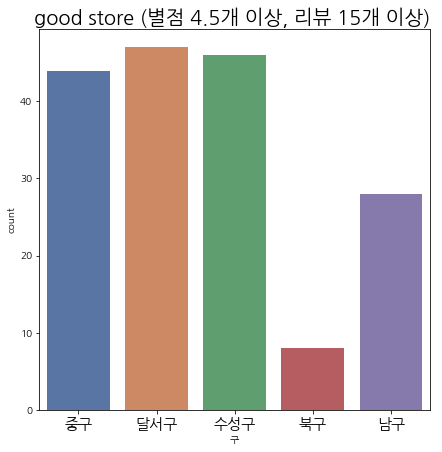

In [311]:
#구별로 good store의 개수 countplot으로 출력 #
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(7, 7))
sns.countplot(x='구', data=high_rates_final2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.title('good store (별점 4.5개 이상, 리뷰 15개 이상) ', fontsize=20)
plt.show()

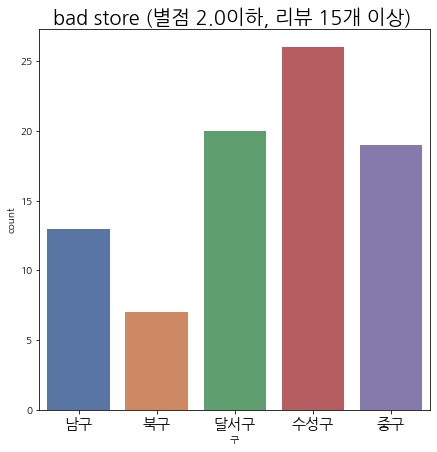

In [312]:
#구별로 bad store의 개수 countplot으로 출력 #
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(7, 7))
sns.countplot(x='구', data=row_rates_final2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.title('bad store (별점 2.0이하, 리뷰 15개 이상) ', fontsize=20)
plt.show()

In [319]:
#위 지도는 낮은 평점의 가게들을 지도로 시각화 한 모습 , 동그라미 클릭시에 이름, 주소가 나옴#
map = fol.Map(location=[row_rates_final['위도'].mean(), row_rates_final['경도'].mean()], zoom_start=12)

for n in row_rates_final.index:

    popup_name = row_rates_final.loc[n, '상호지점명'] + ' - ' + row_rates_final.loc[n, '도로명주소']
    icon_color = 'red'
    
    fol.CircleMarker(
        location=[row_rates_final.loc[n,'위도'], row_rates_final.loc[n, '경도']],
        radius=5,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

map

In [318]:
#위 지도는 높은 평점의 가게들을 지도로 시각화 한 모습 , 동그라미 클릭시에 이름, 주소가 나옴#


map = fol.Map(location=[high_rates_final['위도'].mean(), high_rates_final['경도'].mean()], zoom_start=12)

for n in high_rates_final.index:

    popup_name = high_rates_final.loc[n, '상호지점명'] + ' - ' + high_rates_final.loc[n, '도로명주소']
    icon_color = 'blue'
    
    fol.CircleMarker(
        location=[high_rates_final.loc[n,'위도'], high_rates_final.loc[n, '경도']],
        radius=5,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

map